### Seattle Real Estate Market using Redfin sale data and Geopandas for geospatial visualization.

Import Libraries.

In [1]:
import sys
import folium
import pandas as pd
import seaborn as sns
import geopandas as gpd
from geopy.geocoders import Nominatim
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)
#np.set_printoptions(threshold=sys.maxsize)


print('-All libraries installed.')

-All libraries installed.


Import Shapefile.

In [2]:
shapefile = 'seattle_hood_shapefile\City_Clerk_Neighborhoods.shp'

Read Shapefile.

In [3]:
g_read =  gpd.read_file(shapefile)

Filter the required coluumns. Renaming columns names. Setting geometry in the geometry columm.

In [4]:
gdf = g_read[['L_HOOD','S_HOOD','geometry']].rename(columns={'L_HOOD':'District','S_HOOD':'Neighborhood','geometry':'Geometry'}).set_geometry('Geometry')

Add missing values to the District column.

In [5]:
gdf.loc[30:40,'District'] = 'NORTH SEATTLE'
gdf.loc[66,'District'] = 'INDUSTRIAL DISTRICT'
gdf.loc[67:68,'District'] = 'SOUTH END'
gdf.loc[69,'District'] = 'INDUSTRIAL DISTRICT'
gdf.loc[95,'District'] = 'NORTH SEATTLE'
gdf.loc[106,'District'] = 'INDUSTRIAL DISTRICT'
gdf.loc[109:110,'District'] = 'NORTH SEATTLE'
gdf.loc[113,'District'] = 'NORTH SEATTLE'
gdf.loc[116:117,'District'] = 'NORTH SEATTLE'

Drop all NaN values.

In [6]:
gdf.dropna(inplace=True, axis=0)

Sort rows alphabetically  in ascending order.

In [7]:
gdf = gdf.sort_values(['District','Neighborhood'], ascending=True).reset_index(drop=True)

Print the GeoDataFrame. 

In [8]:
print(gdf.shape)
gdf.head()

(91, 3)


,District,Neighborhood,Geometry
0,BALLARD,Adams,"POLYGON ((-122.37634 47.67592, -122.37621 47.6..."
1,BALLARD,Loyal Heights,"POLYGON ((-122.37634 47.67592, -122.37671 47.6..."
2,BALLARD,Sunset Hill,"POLYGON ((-122.40211 47.69768, -122.40203 47.6..."
3,BALLARD,West Woodland,"POLYGON ((-122.37634 47.67592, -122.37608 47.6..."
4,BALLARD,Whittier Heights,"POLYGON ((-122.37634 47.67592, -122.37652 47.6..."


Check Coordinate Reference System projection.

In [9]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Re-project Coordinate Reference System.

In [10]:
gdf = gdf.to_crs(epsg=2263)
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Print GeoDataFrame with re-projected CRS(Coordinate Reference System)

In [11]:
print(gdf.shape)
gdf.head()

(91, 3)


,District,Neighborhood,Geometry
0,BALLARD,Adams,"POLYGON ((-10420753.598 5975251.531, -10420761..."
1,BALLARD,Loyal Heights,"POLYGON ((-10420753.598 5975251.531, -10420816..."
2,BALLARD,Sunset Hill,"POLYGON ((-10422000.320 5985415.285, -10421982..."
3,BALLARD,West Woodland,"POLYGON ((-10420753.598 5975251.531, -10420703..."
4,BALLARD,Whittier Heights,"POLYGON ((-10420753.598 5975251.531, -10420766..."


Create an Centroid column.

In [12]:
gdf['Centroid']=gdf.centroid

Print the GeoDataFrame with the Centroid column.

In [13]:
print(gdf.shape)
gdf.head()

(91, 4)


,District,Neighborhood,Geometry,Centroid
0,BALLARD,Adams,"POLYGON ((-10420753.598 5975251.531, -10420761...",POINT (-10423981.696 5974726.609)
1,BALLARD,Loyal Heights,"POLYGON ((-10420753.598 5975251.531, -10420816...",POINT (-10421143.604 5978668.114)
2,BALLARD,Sunset Hill,"POLYGON ((-10422000.320 5985415.285, -10421982...",POINT (-10424771.990 5980054.804)
3,BALLARD,West Woodland,"POLYGON ((-10420753.598 5975251.531, -10420703...",POINT (-10420658.966 5971720.183)
4,BALLARD,Whittier Heights,"POLYGON ((-10420753.598 5975251.531, -10420766...",POINT (-10418285.993 5976919.652)


Reverse CRS projection in Geometry column to WGS84.

In [14]:
gdf = gdf.to_crs(epsg=4326)


Re-project CRS to WGS84 in Centroid column.

In [15]:
gdf['Centroid'] = gdf['Centroid'].to_crs(epsg=4326)

Print GeoDataFrame with CRS with WGS84 projection in the Geometry and the Centroid column.

In [16]:
print(gdf.shape)
gdf.head()

(91, 4)


,District,Neighborhood,Geometry,Centroid
0,BALLARD,Adams,"POLYGON ((-122.37634 47.67592, -122.37621 47.6...",POINT (-122.38630 47.67009)
1,BALLARD,Loyal Heights,"POLYGON ((-122.37634 47.67592, -122.37671 47.6...",POINT (-122.38490 47.68328)
2,BALLARD,Sunset Hill,"POLYGON ((-122.40211 47.69768, -122.40203 47.6...",POINT (-122.40028 47.68131)
3,BALLARD,West Woodland,"POLYGON ((-122.37634 47.67592, -122.37608 47.6...",POINT (-122.36855 47.66787)
4,BALLARD,Whittier Heights,"POLYGON ((-122.37634 47.67592, -122.37652 47.6...",POINT (-122.37140 47.68331)


Split Centroid column to Latitude and Longitude seperate columns.

In [17]:
gdf['Latitude'] = gdf.Centroid.y
gdf['Longitude'] = gdf.Centroid.x

Print geo dataframe with Latitude and Longitude columns

In [18]:
print(gdf.shape)
gdf.head()

(91, 6)


,District,Neighborhood,Geometry,Centroid,Latitude,Longitude
0,BALLARD,Adams,"POLYGON ((-122.37634 47.67592, -122.37621 47.6...",POINT (-122.38630 47.67009),47.670093,-122.386299
1,BALLARD,Loyal Heights,"POLYGON ((-122.37634 47.67592, -122.37671 47.6...",POINT (-122.38490 47.68328),47.683276,-122.384898
2,BALLARD,Sunset Hill,"POLYGON ((-122.40211 47.69768, -122.40203 47.6...",POINT (-122.40028 47.68131),47.681307,-122.400276
3,BALLARD,West Woodland,"POLYGON ((-122.37634 47.67592, -122.37608 47.6...",POINT (-122.36855 47.66787),47.667871,-122.368548
4,BALLARD,Whittier Heights,"POLYGON ((-122.37634 47.67592, -122.37652 47.6...",POINT (-122.37140 47.68331),47.683305,-122.371397


Read Redfin CSV file.

In [19]:
redfin_df = pd.read_csv('data_Full_Data_data(8).csv')

Print Redfin DataFrame.

In [20]:
print(redfin_df.shape)
redfin_df.head()

(15518, 65)


,Region,Year of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,City,last_updated,Measure Display,parent_metro_region,Period Begin,Period End,State,Table Id,Worksheet Filter,active_listings,active_listings_mom,active_listings_yoy,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,Homes Sold Mom,Homes Sold Yoy,Inventory,Inventory Mom,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median List Ppsf,Median List Ppsf Mom,Median List Ppsf Yoy,Median List Price,Median List Price Mom,Median List Price Yoy,Median Ppsf,Median Ppsf Mom,Median Ppsf Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,New Listings,New Listings Mom,New Listings Yoy,Number of Records,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code,pending_sales,pending_sales_mom,pending_sales_yoy,Period Duration,Price Drops,Price Drops Mom,Price Drops Yoy,property_type_id,region_type_id,Sold Above List,Sold Above List Mom,Sold Above List Yoy
0,"Seattle, WA - Magnolia",2012,All Residential,Neighborhood,False,WA,Seattle,12/12/2021 2:26:58 PM,NaN,"Seattle, WA",4/1/2012,6/30/2012,Washington,1604,Value,211.0,0.024272,0.065657,0.991403,0.7%,2.6%,113,32.9%,50.7%,85.0,2.4%,-21.3%,19.5,-9.0,-13.0,253.651386,0.001119,0.116159,549725.0,-0.008388,0.243722,254.237288,0.031098,0.226165,$494K,1.7%,9.8%,NaN,NaN,NaN,130.0,-3.0%,16.1%,1,0.555556,0.031746,0.191919,42644,27.0,-35.7%,22.7%,90,NaN,NaN,NaN,-1,1,0.265487,-0.005102,0.172153
1,"Seattle, WA - Beacon Hill",2012,All Residential,Neighborhood,False,WA,Seattle,12/12/2021 2:26:58 PM,NaN,"Seattle, WA",5/1/2012,7/31/2012,Washington,1853,Value,186.0,-0.005348,-0.154545,0.991635,-1.2%,2.7%,94,10.6%,25.3%,85.0,6.3%,-33.6%,34.0,16.5,-17.0,166.015625,0.028528,0.046560,279950.0,0.010741,0.120024,159.757675,0.020235,0.024861,$263K,6.4%,5.2%,NaN,NaN,NaN,105.0,1.0%,-7.1%,1,0.529412,0.029412,-0.026144,42644,17.0,-39.3%,-5.6%,90,NaN,NaN,NaN,-1,1,0.255319,-0.027034,0.095319
2,"Seattle, WA - Minor",2013,All Residential,Neighborhood,False,WA,Seattle,12/12/2021 2:26:58 PM,NaN,"Seattle, WA",2/1/2013,4/30/2013,Washington,183034,Value,54.0,0.058824,0.459459,1.012555,1.0%,2.4%,42,27.3%,147.1%,10.0,11.1%,-37.5%,11.0,-2.0,-58.0,287.500569,-0.027876,0.102328,442500.0,-0.078029,0.040090,292.009991,0.052921,0.443395,$460K,8.0%,33.3%,NaN,NaN,NaN,40.0,-2.4%,66.7%,1,0.666667,-0.119048,-0.333333,42644,6.0,-57.1%,50.0%,90,NaN,NaN,NaN,-1,1,0.523810,0.069264,0.288515
3,"Seattle, WA - Ravenna",2013,All Residential,Neighborhood,False,WA,Seattle,12/12/2021 2:26:58 PM,NaN,"Seattle, WA",3/1/2013,5/31/2013,Washington,2248,Value,58.0,0.054545,0.074074,1.022392,1.5%,0.8%,49,36.1%,28.9%,10.0,42.9%,-33.3%,7.0,-1.0,0.5,261.797753,-0.013810,0.013681,489950.0,-0.010202,0.031474,273.234201,-0.008747,0.098487,$525K,9.6%,6.5%,NaN,NaN,NaN,53.0,29.3%,17.8%,1,0.764706,-0.130031,0.219251,42644,17.0,-10.5%,54.5%,90,NaN,NaN,NaN,-1,1,0.653061,0.180839,0.047798
4,"Seattle, WA - Northgate",2013,All Residential,Neighborhood,False,WA,Seattle,12/12/2021 2:26:58 PM,NaN,"Seattle, WA",5/1/2013,7/31/2013,Washington,1894,Value,272.0,0.142857,0.265116,1.013162,-0.2%,1.2%,148,15.6%,33.3%,90.0,23.3%,18.4%,10.0,2.0,-3.0,227.005742,0.019420,0.103109,339361.0,0.028445,0.060835,223.255149,0.014209,0.120328,$347K,-0.7%,10.3%,NaN,NaN,NaN,224.0,15.5%,60.0%,1,0.617647,0.037647,0.034314,42644,68.0,36.0%,88.9%,90,NaN,NaN,NaN,-1,1,0.452703,-0.070735,0.074324


Convert values in period begin, and period end column to DateTime Series.

In [21]:
redfin_df['Period Begin'] = pd.to_datetime(redfin_df['Period Begin'])
redfin_df['Period End'] = pd.to_datetime(redfin_df['Period End'])

Strip/Replace values in Median Sale Price column, and convert it to float datatype.

In [22]:
redfin_df['Median Sale Price'] = (((redfin_df['Median Sale Price'].str.strip('$').str.strip('K')).str.replace(',','')).str.strip('')).astype(float)

Strip/Replace values in region column.

In [23]:
redfin_df['Region'] = (redfin_df['Region'].str.replace('Seattle, WA - ','').str.strip(''))

Sort values in ascending order and reset the DataFrame index.

In [24]:
redfin_df = redfin_df.sort_values(by=['Region', 'Year of Period End', 'Period End'], ascending=True).reset_index(drop=True)

Drop columns where all values are missing.

In [25]:
redfin_df = redfin_df.dropna(axis=1, how='all')

Drop columns with irrelavent data for analysis.

In [26]:
redfin_df = redfin_df.drop(['Property Type', 'Region Type', 'Seasonally Adjusted', 'last_updated', 'parent_metro_region', 'State',	'Table Id',	'Worksheet Filter'], axis=1)

Rename some of the columns.

In [27]:
redfin_df = redfin_df.rename(columns={'Region':'Neighborhood', 'Year of Period End':'Year', 'State Code':'State'})

Print DataFrame.

In [28]:
print(redfin_df.shape)
redfin_df.head()

(15518, 50)


,Neighborhood,Year,State,City,Period Begin,Period End,active_listings,active_listings_mom,active_listings_yoy,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,Homes Sold Mom,Homes Sold Yoy,Inventory,Inventory Mom,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median List Ppsf,Median List Ppsf Mom,Median List Ppsf Yoy,Median List Price,Median List Price Mom,Median List Price Yoy,Median Ppsf,Median Ppsf Mom,Median Ppsf Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy,Number of Records,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code,pending_sales,pending_sales_mom,pending_sales_yoy,Period Duration,property_type_id,region_type_id,Sold Above List,Sold Above List Mom,Sold Above List Yoy
0,Adams,2012,WA,Seattle,2011-12-01,2012-02-29,69.0,-0.115385,-0.241758,0.986459,0.2%,1.0%,40,-7.0%,21.2%,30.0,0.0%,-37.5%,39.5,-8.0,-16.0,300.400534,0.057255,0.021362,325000.0,-0.007558,-0.029706,271.526899,0.000183,-0.149405,348.0,-0.7%,3.6%,27.0,-15.6%,-40.0%,1,0.833333,0.433333,0.458333,42644,6.0,-40.0%,-25.0%,90,-1,1,0.225000,0.062209,0.164394
1,Adams,2012,WA,Seattle,2012-01-01,2012-03-31,76.0,0.101449,-0.224490,0.988664,0.2%,0.7%,39,-2.5%,5.4%,24.0,-20.0%,-52.0%,47.5,8.0,0.5,280.303030,-0.066902,-0.046970,339000.0,0.043077,-0.031429,268.604004,-0.010765,-0.100666,345.0,-0.7%,3.0%,43.0,59.3%,-33.8%,1,0.650000,-0.183333,0.116667,42644,20.0,233.3%,33.3%,90,-1,1,0.230769,0.005769,0.149688
2,Adams,2012,WA,Seattle,2012-02-01,2012-04-30,93.0,0.223684,-0.010638,0.989971,0.1%,0.4%,46,17.9%,7.0%,36.0,50.0%,-26.5%,38.0,-9.5,20.0,274.229075,-0.021669,-0.043252,332950.0,-0.017847,-0.085302,287.412587,0.070023,0.000038,323.0,-6.3%,-6.3%,65.0,51.2%,20.4%,1,0.800000,0.150000,0.300000,42644,15.0,-25.0%,50.0%,90,-1,1,0.282609,0.051839,0.189585
3,Adams,2012,WA,Seattle,2012-03-01,2012-05-31,98.0,0.053763,-0.048544,0.993952,0.4%,0.9%,55,19.6%,25.0%,32.0,-11.1%,-38.5%,32.0,-6.0,9.0,278.979948,0.017324,-0.039502,349000.0,0.048205,-0.001431,274.743083,-0.044081,-0.062562,328.0,1.5%,-8.9%,71.0,9.2%,26.8%,1,0.555556,-0.244444,0.333333,42644,18.0,20.0%,100.0%,90,-1,1,0.272727,-0.009881,0.136364
4,Adams,2012,WA,Seattle,2012-04-01,2012-06-30,90.0,-0.081633,-0.072165,0.989912,-0.4%,-0.7%,63,14.5%,70.3%,25.0,-21.9%,-47.9%,16.0,-16.0,-20.5,282.462458,0.012483,-0.021397,346975.0,-0.005802,0.067698,271.326230,-0.012437,-0.077525,328.0,0.0%,-2.1%,68.0,-4.2%,41.7%,1,0.478261,-0.077295,0.078261,42644,23.0,27.8%,130.0%,90,-1,1,0.269841,-0.002886,0.053625


Create a copy of the original Dataframe with only the columns needed for this analysis.

In [29]:
median_sale_df = redfin_df[['Neighborhood', 'Year', 'Median Sale Price']].copy()

Group and calculate the residential median sale prices per each year for all neighborhoods.

In [30]:
median_sale_df = median_sale_df.groupby(['Neighborhood', 'Year']).median().reset_index()

Print median sale price DataFrame.

In [31]:
print(median_sale_df.shape)
median_sale_df.head()

(1349, 3)


,Neighborhood,Year,Median Sale Price
0,Adams,2012,328.0
1,Adams,2013,401.5
2,Adams,2014,463.5
3,Adams,2015,508.0
4,Adams,2016,560.0


I downloaded real estate market data from the year 2012 to 2021. Checking if some neighborhoods are missing any yearly median sale prices. I'm using value_counts to achieve this goal.

In [32]:
value_count = median_sale_df['Neighborhood'].value_counts()

Print value count results. It looks like Redfin didn't have enough data for three neighborhoods yearly sales. One of these neigghborhoods was the Industrial District.

In [33]:
value_count.head()

Adams             10
Northgate         10
Ravenna           10
Rainier View      10
Rainier Valley    10
Name: Neighborhood, dtype: int64

In the next steps I'll be merging the GeoDataFrame(gdf) with the Redfin Median Sale Dataframe(median_sale_df).

First, drop the neighborhood duplicate entries(rows) and store a copy in a new variable.

In [34]:
redfin_hood_count = median_sale_df['Neighborhood'].drop_duplicates().reset_index(drop=True).copy()

Next, count the indexes of each DataFrame. It looks like the Redfin Hood Count has more entries. Note that I'm using the 'Neighborhood' column for comparison.

In [35]:
print('Number of neighborhoods in the Geopandas DataFrame:', len(gdf.index))
print('Number of Neighborhoods in the Redfin Hood Count DataFrame:', len(redfin_hood_count.index))

Number of neighborhoods in the Geopandas DataFrame: 91
Number of Neighborhoods in the Redfin Hood Count DataFrame: 136


Run a python 'for loop' code to extract which entries are missing. I'll store the results in a list.

In [36]:
#Inner Merge list
redfin_hood_list = redfin_hood_count.tolist()
#Left Merge list
gdf_list= gdf['Neighborhood'].tolist()

gdf_redfin_list_dif=[]

for item in redfin_hood_list:
    if item not in gdf_list:
        gdf_redfin_list_dif.append(item)

Most of the names below are district names. Each district overlaps a group of neighborhoods.
I'll ignore the district's entries. and use only the names of the neighborhoods.
Besides, there are some inconsistencies with some of the neighborhood names. I'll be renaming them.

In [37]:
print(len(gdf_redfin_list_dif))
print(gdf_redfin_list_dif)

53
['Alki Point', 'Ballard', 'Beacon Hill', 'Boulevard Place', 'Brighton Beach Acre', 'Capitol Hill', 'Cascade', 'Central District', 'Central Seattle', 'Cherry Hill', 'Delridge', 'Denny Blaine', 'Denny Triangle', 'Downtown Seattle', 'East Park', 'Greater Duwamish', 'Hawthorne Hills', 'Highlands', 'Judkins Park', 'Lake City', 'Lake View', 'Lincoln Beach', 'Madison Valley', 'Magnolia', 'Motor Line', 'Mount Baker Park', 'New Holly', 'New Rainier Vista', 'North Beach', 'North Grove', 'North Park', 'North Seattle', 'Northeast Seattle', 'Northgate', 'Northlake', 'Northwest Seattle', 'Pettits University', 'Queen Anne', 'Rainier Valley', 'Ravenna Park', 'Renton Hill', 'Roosevelt Heights', 'Seattle Central Business District', 'Squire Park', 'The Ave', 'The Baltimore', 'University Heights', 'University Park', 'University Village', 'Waterfront', 'West Edge', 'West Seattle', 'Woodland Park']


Do an an 'Inner' merge with the key on Neighborhoods. This way, all districts will be ignored. The inconsistent neighborhood names will be ignored as well.

In [38]:
merged1 = gdf.merge(redfin_hood_count, how='inner', on='Neighborhood')

The new merged1 dataset contains only 84 entries. The gdf GeoDataFrame has 91.

In [39]:
print(merged1.shape)
print(gdf.shape)

(84, 6)
(91, 6)


Use a python 'for loop' code again. Will be using the merged1 and gdf datasets for comparison.

In [40]:
#Inner Merge list
merged_list1 = merged1['Neighborhood'].tolist()
#Left Merge list
merged_list2= gdf['Neighborhood'].tolist()

list_dif=[]

for item in merged_list2:
    if item not in merged_list1:
        list_dif.append(item)

The results are the inconsistent neighborhoods names. The names in the list below is reffering to the same neighborhoods on DataFrame, but just a diferent name.

In [41]:
list_dif

['Holly Park',
 'Harrison/Denny-Blaine',
 'Central Business District',
 'Harbor Island',
 'North Beach/Blue Ridge',
 'Sand Point',
 'Alki']

Let's replace these neighborhood names so is consistent in both datasets. Once done, I'll store it in a new variable.

In [42]:
replacements = {'Alki':'Alki Point', 'Central Business District': 'Seattle Central Business District', 'Harrison/Denny-Blaine':'Denny Blaine', 'Holly Park': 'New Holly', 'North Beach/Blue Ridge': 'North Beach'}
new_gdf= gdf.replace(replacements, regex=True)

After eliminating the inconsistencies, 'Inner' merge the new GeoDataframe with Redfin Median Sale DataFrame. Sort the values by 'Neighborhood' and 'Year'.

In [43]:
merged_df = new_gdf.merge(median_sale_df, how='inner', on='Neighborhood').sort_values(['Neighborhood','Year'], ascending=True)

Print the merged DataFrame.

In [44]:
print(merged_df.shape)
merged_df.head()

(878, 8)


,District,Neighborhood,Geometry,Centroid,Latitude,Longitude,Year,Median Sale Price
0,BALLARD,Adams,"POLYGON ((-122.37634 47.67592, -122.37621 47.6...",POINT (-122.38630 47.67009),47.670093,-122.386299,2012,328.0
1,BALLARD,Adams,"POLYGON ((-122.37634 47.67592, -122.37621 47.6...",POINT (-122.38630 47.67009),47.670093,-122.386299,2013,401.5
2,BALLARD,Adams,"POLYGON ((-122.37634 47.67592, -122.37621 47.6...",POINT (-122.38630 47.67009),47.670093,-122.386299,2014,463.5
3,BALLARD,Adams,"POLYGON ((-122.37634 47.67592, -122.37621 47.6...",POINT (-122.38630 47.67009),47.670093,-122.386299,2015,508.0
4,BALLARD,Adams,"POLYGON ((-122.37634 47.67592, -122.37621 47.6...",POINT (-122.38630 47.67009),47.670093,-122.386299,2016,560.0


Check for any NaN values over the entire new DataFrame.

In [45]:
merged_df.isnull().values.any()

False

### The data is clean and ready to give us some insights about Seattle Residential Real Estate Market.

Let's take a look how was the market growth for the whole metropolitan area of Seattle since the year of 2012. Now, I'll group the merged_df DataFrame by year and calculate the median sale prices. In 2012 the median Sale price of a sold houses in Seattle was $368,000. In 2021 the same houses were sold for 
$791,000. That's aproximately a 100% increase in 9 years.

In [46]:
market_growth = merged_df.groupby('Year').median('Median Sale Price').drop(['Latitude', 'Longitude'], axis=1).reset_index()
market_growth

,Year,Median Sale Price
0,2012,368.0
1,2013,401.5
2,2014,460.0
3,2015,516.5
4,2016,592.5
5,2017,698.0
6,2018,723.0
7,2019,714.0
8,2020,718.0
9,2021,790.0


Let's use a barplot to visualize the market growth. 

According to the barplot, we can see the price spike between 2012 and 2017. After that, the market halted till 2020. However, the market saw a little spurt in prices for 2021. It was an increase of approximately $70,000 for the median sale price for the whole region.


In the link below, we can read about a possible reason why the real estate prices in Seattle spiked almost 100% in just five years. The tech industry was and still is the main reason for this growth. 
Amazon has been in the epicenter of this real estate earthquake. Amazon had 56,000 employees in 2011 and had hired an additional 556,000 employees by 2018. That's a total of 613,000 people working for Amazon by 2018. Although not all employees were hired to work in Seattle.

<a href='https://www.fastcompany.com/90331689/amazons-wild-24-year-ride-from-11-employees-to-600000-plus'>- Amazon wild 24 year ride from 11 employees to 600,000.</a>

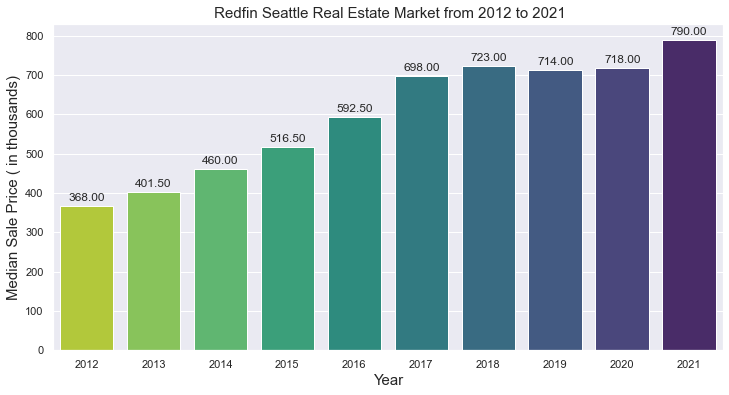

In [47]:
plt.figure(figsize=(12,6))
sns.set_theme(style='darkgrid')
plots  = sns.barplot(x=market_growth['Year'], y=market_growth['Median Sale Price'], data=market_growth, palette='viridis_r')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width()/2, bar.get_height()), ha='center', va='center', size=12, xytext=(0,8), textcoords='offset points')
    
plt.xlabel('Year', size=15)
plt.ylabel('Median Sale Price ( in thousands)', size=15)
plt.title(f' Redfin Seattle Real Estate Market from {market_growth.iloc[0,0]} to {market_growth.iloc[0-1,0]}', size=15)

plt.show()

#### Now, let's plot a Choropleth heat map usisng GeoPandas. 

In the next cell I'll use Nominatin geolocator to retrive the coordinates for the city of Seattle.

In [48]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="Foursquare Agent")
location = geolocator.geocode(address, timeout=None)
sea_lat = location.latitude
sea_lng = location.longitude
print(sea_lat, sea_lng)

47.6038321 -122.3300624


Let's retrieve the median sale price for each neighborhood in the year of 2021. Let's store it in a new variable.

In [49]:
year_sale = merged_df[merged_df['Year']==2021]

Drop Centroid column.

In [50]:
year_sale_copy = year_sale.drop('Centroid', axis=1).copy()

Create a Folium map.

In [51]:
sea_map1 = folium.Map(location=[sea_lat,sea_lng],zoom_start=10.5, tiles='CartoDB positron')

Create Folium Feature Group.

In [52]:
hood_bound_group = folium.FeatureGroup(name = 'Neighborhood Boundaries')
median_sale_group = folium.FeatureGroup(name = 'Residential Median Sale Price')

Create a Choropleth map.

In [53]:
folium.Choropleth(
    geo_data=year_sale_copy, 
    data=year_sale_copy, 
    columns=['Neighborhood','Median Sale Price'],
    key_on='feature.properties.Neighborhood', 
    fill_color='YlOrRd', 
    fill_opacity=1, 
    line_opacity=.2, 
    legend_name= 'Residential Median Sale Price for Seattle Neighborhoods',
    smooth_factor=0, 
    Highlight=True, 
    line_color='#0000', 
    name='Neighborhood',
    show=False, 
    overlay=True, 
    nan_fill_collor='Grey').add_to(sea_map1)

Using a 'for loop' we will itter through every row in the year_sale dataset. By doing so, it will generate tooltips with the neighborhood and district information. It will generate folium markers with the median sale prices for each neighborhood.

In [54]:
for k, v in year_sale.iterrows():
    sim_geo = gpd.GeoSeries(v['Geometry']).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(
        data=geo_j, 
        style_function=lambda x:{'fillcolor':'orange'}, 
        tooltip='District: {}<br> Neighborhood: {}'.format(v['District'], v['Neighborhood']))
    geo_j.add_to(hood_bound_group)

    lat = v['Centroid'].y
    lng = v['Centroid'].x
    folium.Marker(
        [lat,lng], 
        popup='Median Sale Price in <br>{} for {}: ${},000'.format(v['Year'],v['Neighborhood'], int(v['Median Sale Price']))).add_to(median_sale_group)

Let's add it to it's respective groups.

In [55]:
hood_bound_group.add_to(sea_map1)
median_sale_group.add_to(sea_map1)

Ultimately, show the map.

The colors in the heat map range gradually from green to red. The red areas are the most expensive neighborhoods to buy a home. The locations in green are the cheapest neighborhoods to purchase homes. The yellow falls under the median price range. 
The Redfin dataset helps give us some real estate market insights. However, they lack some variables to make any business decision. Variables like: Lot size, square footage, year built, style, building material quality, etc. In general, this visualization can still give us some idea of where the real estate market trend is moving for the region of Seattle.

One footnote: 
This map is missing regions like Industrial District, Harbor Island, and Magnuson Park. It's missing because the Redfin dataset doesn't have any data for the year shown.

In [56]:
sea_map1

### Final Notes:

Furthermore, I intend to continue using this notebook to create a more interactive map. Also, I'd like to build some predictive models based on this data.